In [ ]:
%matplotlib inline


# Confusion matrix


Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using `grid_search`.




In [35]:
%run utils/utilities.py

Automatically created module for IPython interactive environment
[[2 0 0]
 [1 0 1]
 [0 2 0]]
Confusion matrix, without normalization
[[2 0 0]
 [1 0 1]
 [0 2 0]]


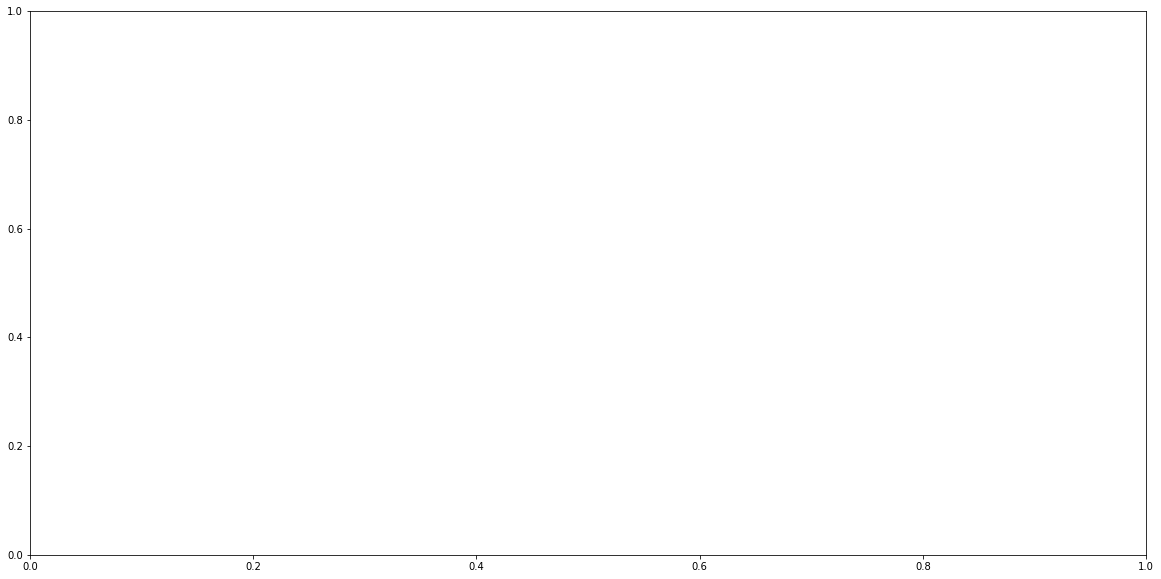

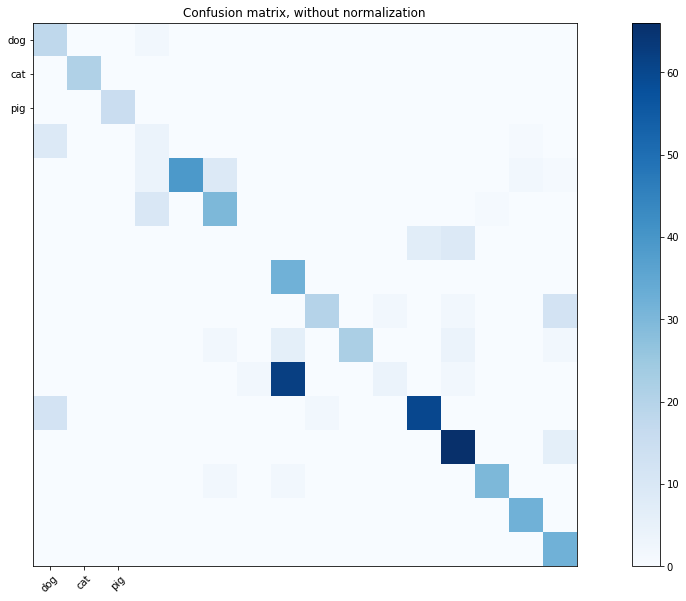

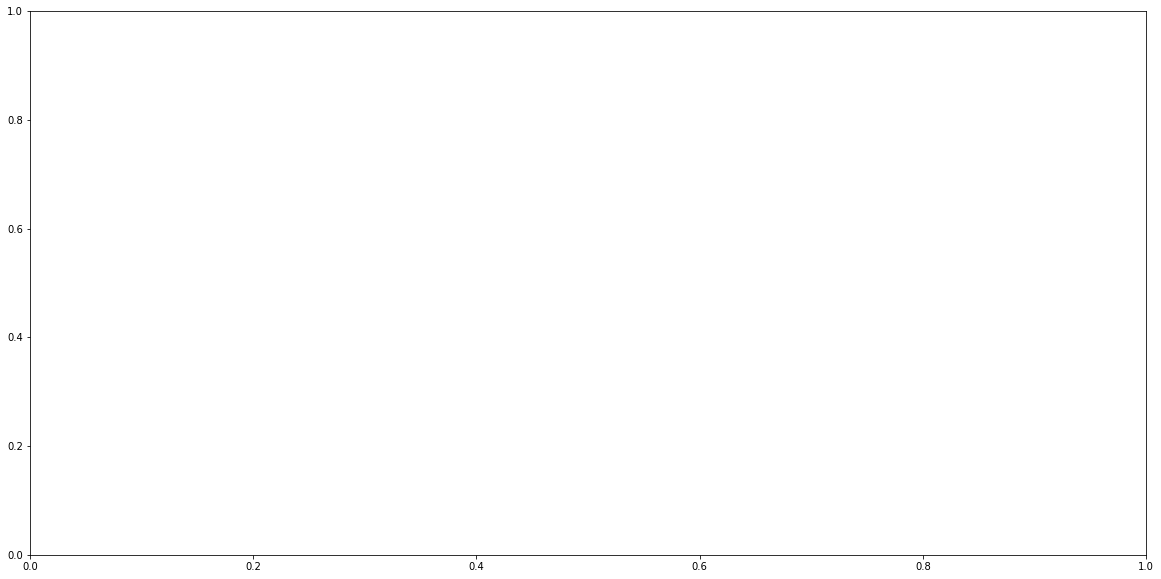

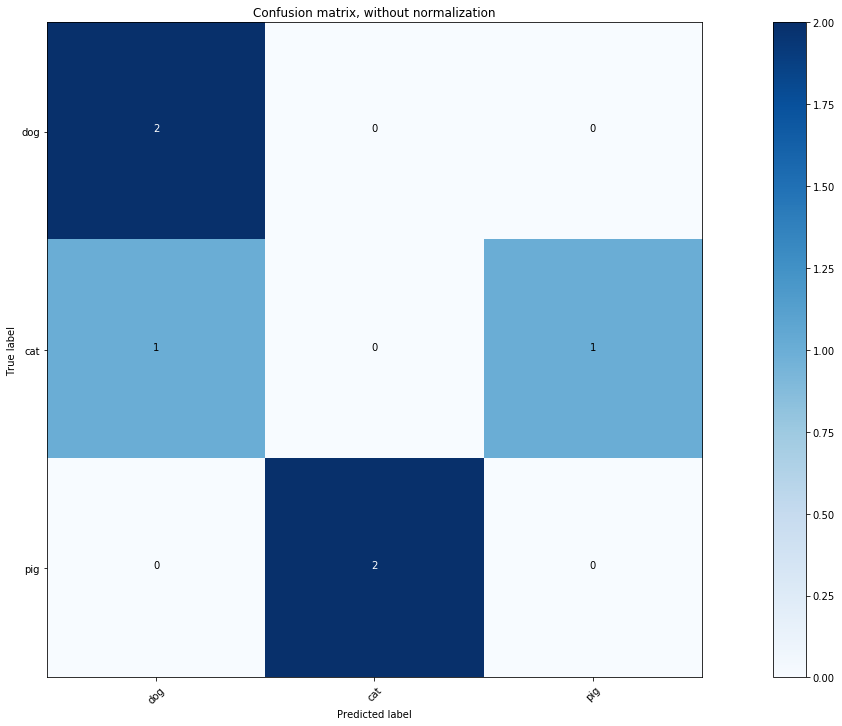

In [31]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])
cnf_matrix = confusion_matrix(y_true, y_pred)
print cnf_matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig, ax = plt.subplots() 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['dog', 'cat', 'pig'],
                      title='Confusion matrix, without normalization')

plt.show()

Normalized confusion matrix
[[ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.84  0.05  0.    0.    0.    0.    0.    0.    0.11
   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.02  0.08  0.03  0.84  0.03  0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.98  0.    0.    0.    0.    0.
   0.    0.    0.02  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
   0

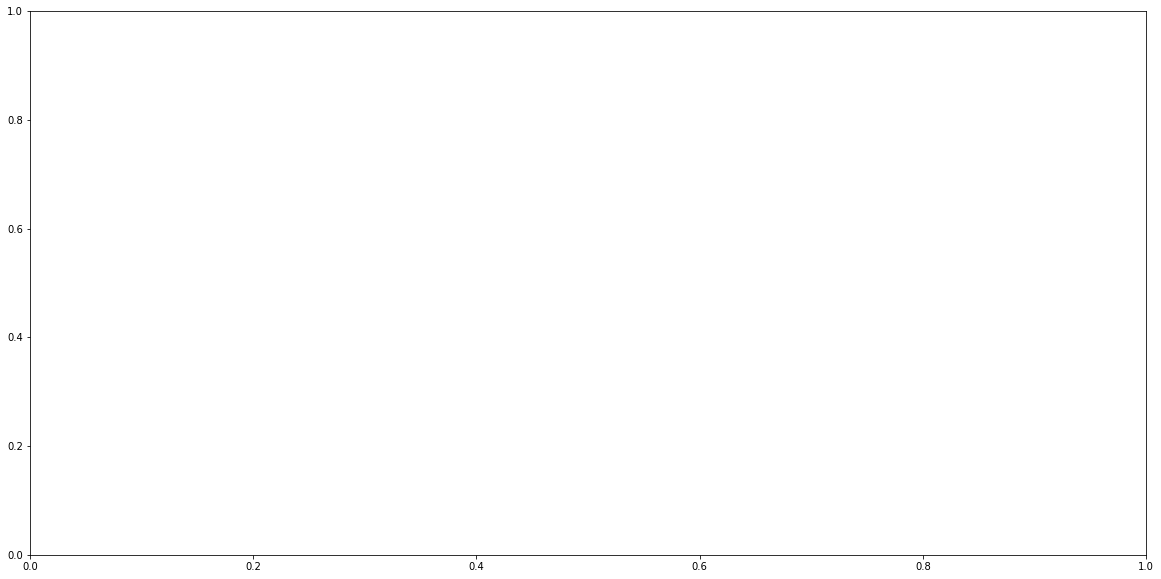

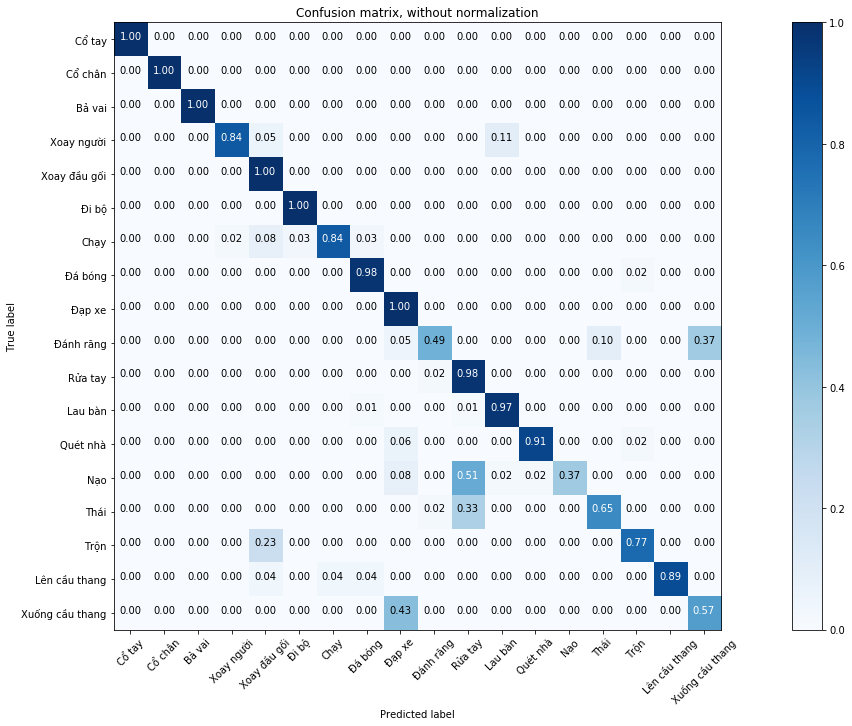

In [45]:
import numpy as np
class_label_vn = [u"Cổ tay",u"Cổ chân",u"Bả vai",u"Xoay người",u"Xoay đầu gối",u"Đi bộ",u"Chạy",u"Đá bóng",u"Đạp xe",u"Đánh răng",u"Rửa tay", u"Lau bàn", u"Quét nhà", u"Nạo",u"Thái",u"Trộn",u"Lên cầu thang",u"Xuống cầu thang"]
arr =[[19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,16,1,0,0,0,0,0,0,2,0,0,0,0,0,0],[0,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,5,2,52,2,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,54,0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,2,20,0,0,0,0,4,0,0,15],[0,0,0,0,0,0,0,0,0,1,46,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,1,72,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,3,0,0,0,43,0,0,1,0,0],[0,0,0,0,0,0,0,0,4,0,25,1,1,18,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,14,0,0,0,28,0,0,0],[0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,24,0,0],[0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,24,0],[0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,12]]

arr = np.asarray(arr)
fig, ax = plt.subplots() 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.figure()
plot_confusion_matrix(arr, classes=class_label_vn,normalize=True,
                      title='Confusion matrix, without normalization')

plt.show()